In [3]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

#### 10.1.3 퍼셉트론
 신경망(딥러닝)의 기원이 되는 알고리즘이라고 할 수 있다. TLU(Threshold Logic Unit)이라는 형태의 뉴런을 기반으로 하며, 각각의 입력에 각각 고유한 가중치가 곱해진다. 그런 다음 계산된 합에 계단 함수(step function)를 적용하여 결과를 출력한다.

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


#### 10.1.4 다층 퍼셉트론과 역전파
 다층 퍼셉트론(MLP)은 아래의 그림과 같이 입력층, 은닉층(hidden layer)이라 부르는 하나 이상의 TLU 층과 마지막으로 출력층(output layer)으로 구성된다. 인공 신경망의 은닉층이 2개 이상일 때, 심층 신경망(DNN, Deep Neural Network)라 하고 이를 학습하여 모델을 만드는 것을 우리가 익히 들어온 딥러닝(Deep-Learning) 이라고 한다.
이렇게 여러층을 쌓은 MLP를 통해 XOR 문제를 해결 했지만, 층이 깊어질 수록 증가하는 가중치 매개변수의 수로 인해 다층 퍼셉트론을 학습시키기에는 오랜 시간이 걸리는 문제가 발생했다. 하지만, 역전파 알고리즘이 등장하면서 계산량을 획기적으로 줄일 수 있게 되었다


#### 역전파법
1. 각 학습 데이터 샘플을 네트워크에 입력으로 넣어주고 출력층까지 각 층의 뉴런 마다 출력을 계산한다. 이를 순전파(forward propagation)이라고 한다.
2. 결과(예측값)와 실제값과의 차이인 오차(error)를 계산하는데, 손실함수(loss function)를 이용하여 계산한다.
3. 이 오차를 역방향으로 흘러 보내면서, 각 출력 뉴런의 오차에 마지막 입력 뉴런이 얼마나 기여했는지 측정한다. 이말을 쉽게 설명하면, 각 뉴런의 입력값에 대한 손실함수의 편미분, 그래디언트(gradient)을 계산하는 것을 말한다.
4. 3번과 같은 방법을 입력층에 도달할 때까지 계속 반복해서 역방향으로 흘러 보낸다.
5. 마지막으로, 계산한 그래디언트를 네트워크의 모든 가중치 매개변수에 반영해주는 경사 하강법 단계를 수행한다.

#### 활성화 함수 (activation function)
역전파 알고리즘이 잘 동작하기 위해서 다층 퍼셉트론(MLP)의 구조에 변화를 주었는 데, 그것이 바로 활성화 함수 부분에서 계단 함수를 시그모이드 함수(로지스틱 함수)로 바꿔준 것이다. 이렇게 활성화 함수를 시그모이드 함수로 바꿔준 이유는 가중치 매개변수를 조정 해주기 위해 그래디언트, 편미분을 계산하게 되는데, 계단 함수는 0을 기준으로 기울기가 없는 직선이므로 그래디언트를 계산하는 것이 의미가 없기 때문이다(0을 기준으로 불연속이기 때문에 미분이 불가능한 이유도 있다)

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

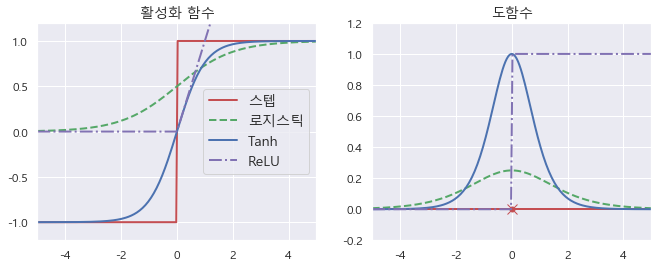

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

#### 소프트맥스(softmax) 함수
소프트맥스 함수(softmax function)는 출력층에서 주로 사용하는 활성화 함수
소프트맥스 함수의 특징은 출력값의 총합이 1이 된다는 것이다. 따라서, 각 출력 뉴런에 대한 소프트맥스의 출력값은 각 클래스에 대응하는 추정 확률값으로 볼 수 있다.

### 10.2 텐서플로 고수준 API로 다층 퍼셉트론 학습하기
텐서플로는 사용자가 쉽게 신경망 모델링을 프로그래밍할 수 있도록 high-level의 API를 제공한다. 대표적인 high-level API로는 tf.estimator와 keras가 있는데, 이에 대한 자세한 내용은 여기에서 참고하면 된다.

아래는 tf.estimator의 DNNClassifier 클래스를 이용해 MNIST 숫자 데이터를 분류

In [13]:
import tensorflow as tf
# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# TF Estimator
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                     feature_columns=feature_cols)

# input function
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

# training
dnn_clf.train(input_fn=input_fn)

AttributeError: module 'tensorflow' has no attribute 'estimator'

In [10]:
tf.__version__

'1.13.1'

### 10.3 텐서플로의 저수준 API로 심층 신경망 학습하기
아래의 예제는 위에서 MNIST 분류기를 Estimator로 구현한 것을 이번에는 텐서플로 Low-Level로 구현한 것이다.

In [ ]:
import tensorflow as tf

# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

reset_graph()

################
# layer params #
################
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

inputs = tf.placeholder(tf.float32, shape=[None, n_inputs], name="inputs")
labels = tf.placeholder(tf.int32, shape=[None], name="outputs")

In [14]:
def neuron_layer(inputs, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(inputs.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal([n_inputs, n_neurons], stddev=stddev)
        weights = tf.Variable(init, name="weights")
        bias = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(inputs, weights) + bias
        if activation:
            return activation(Z)
        else:
            return Z


with tf.name_scope('dnn'):
    hidden1 = neuron_layer(inputs, n_hidden1, name='hidden1', 
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2',
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='logits')        

with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)) 
    
################
# Hyper-params #
################
learning_rate = 0.01
n_epochs = 40
batch_size = 50

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(predictions=logits, targets=labels, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    

NameError: name 'inputs' is not defined

In [15]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

### 10.4 신경망 하이퍼파라미터 튜닝하기
#### 10.4.1 은닉층의 수
뉴런 수만 무한하다면 은닉층 하나로 어떠한 함수도 근사할 수 있다는 것을 밝혔는데, 이를 시벤코 정리(Cybenko's theorem)
심층 신경망(DNN)이 얕은 신경망보다 파라미터 효율성이 훨씬 좋으며 복잡한 함수를 모델링하는 데에 있어 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하기 때문에 학습 시간이 더 빠르다